In [1]:
import json

In [194]:
json_path = "D:/Project/Machine-learning/Qlue-Technical-test/face_train/train"

file = open(json_path + "/annotations.json")

In [195]:
data = json.load(file)
print(type(data))

<class 'dict'>


In [88]:
for key, value in data.items():
    print (key, value)

0000.jpg [[449, 330, 570, 478]]
0001.jpg [[361, 98, 623, 436]]
0002.jpg [[294, 300, 748, 881]]
0003.jpg [[532, 168, 750, 454]]
0004.jpg [[439, 182, 623, 435]]
0005.jpg [[273, 327, 548, 698]]
0006.jpg [[228, 501, 269, 548], [558, 557, 617, 629], [787, 491, 825, 538]]
0007.jpg [[207, 459, 536, 899]]
0008.jpg [[781, 769, 843, 867]]
0009.jpg [[332, 128, 541, 423], [542, 232, 725, 497]]
0010.jpg [[349, 179, 519, 399]]
0011.jpg [[93, 183, 198, 315], [450, 161, 576, 334]]
0012.jpg [[443, 129, 595, 391]]
0013.jpg [[342, 324, 455, 453]]
0014.jpg [[363, 117, 536, 353], [637, 276, 744, 431]]
0015.jpg [[254, 416, 403, 559]]
0016.jpg [[211, 306, 283, 399], [973, 349, 1014, 417]]
0017.jpg [[396, 184, 447, 244]]
0018.jpg [[442, 164, 557, 309]]
0019.jpg [[530, 394, 725, 662]]
0020.jpg [[564, 122, 687, 265], [368, 260, 473, 395]]
0021.jpg [[209, 888, 733, 1662]]
0022.jpg [[404, 94, 535, 273]]
0023.jpg [[527, 277, 686, 460], [142, 458, 261, 580]]
0024.jpg [[350, 256, 501, 431]]
0025.jpg [[734, 112, 835,

In [89]:
for key, value in data.items():
    for values in value:
        xmin = values[0]
        ymin = values[1]
        xmax = values[2]
        ymax = values[3]

In [90]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [119]:
#open image
imgdir = "D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/images"
i = 0
for key, value in data.items():
    imgName = list(data.keys())[i]
    for filename in os.listdir(imgdir)[:]:
        image = cv2.imread(imgdir + "/" + imgName,1)
        for (x,y,w,h) in value:
#             print(x, y, w, h, sep=" ")
#             cv2.rectangle(image, (x, y), (w, h),(0,255,0), 2)
            faceROI = image[y:h,x:w]
            cv2.imwrite("D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/pos/{}.jpg".format(i), faceROI)
    i+=1

# plt.imshow(image)
# plt.show()       
# cv2.imwrite("D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/pos/{}.jpg".format(i), faceROI)


# Correct Coding For Positive Annot

In [ ]:
#open image
imgdir = "D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/images"
i = 0
j = 0
for key in data.items():
    imgName = list(data.keys())[i]
#     print(imgName)
    for filename in os.listdir(imgdir)[:]:
        if filename == imgName:
            image = cv2.imread(imgdir + "/" + imgName,1)
            for valueList in data[imgName]:
#             value = data[imgName]
#             print(value)
#                 print(valueList)
#                 for (x,y,w,h) in valueList:
                x,y,w,h = valueList
#                 print(x, y, w, h, sep=", ")
#         #             cv2.rectangle(image, (x, y), (w, h),(0,255,0), 2)
                faceROI = image[y:h,x:w]
                cv2.imwrite("D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/pos/{}.jpg".format(j), faceROI)
                j+=1
#         if i >= 6:
#             break
#     if i >= 6:
#         break
    i+=1
# plt.imshow(image)
# plt.show()       
# cv2.imwrite("D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/pos/{}.jpg".format(i), faceROI)


In [182]:
imageRandCrop = cv2.imread("D:/Project/Machine-learning/Qlue-Technical-test/face_train/train/images/0000.jpg")

In [184]:
import tensorflow as tf
result = tf.image.random_crop(value=imageRandCrop, size=(120, 120))

plt.imshow(result)
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

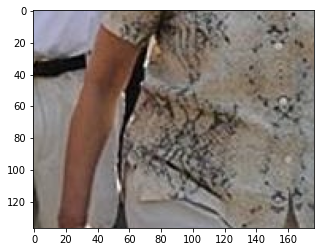

Confidence: 92.17 , Result: not a face


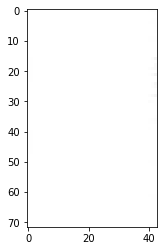

Confidence: 99.82 , Result: not a face


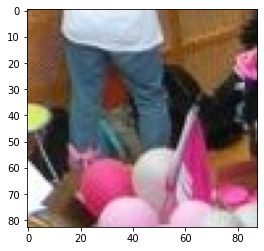

Confidence: 89.82 , Result: not a face


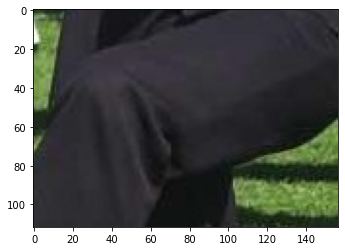

Confidence: 56.85 , Result: not a face


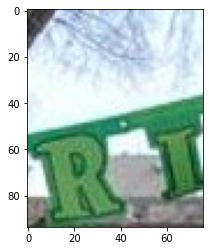

Confidence: 100.0 , Result: not a face


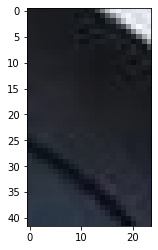

Confidence: 94.74 , Result: not a face


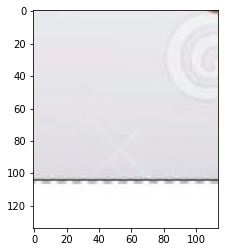

Confidence: 99.44 , Result: not a face


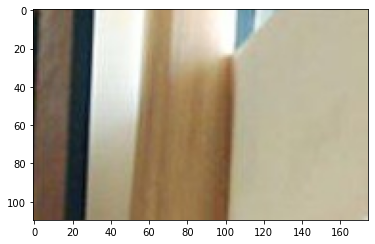

Confidence: 75.84 , Result: face


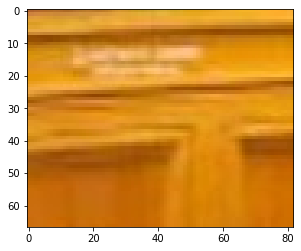

Confidence: 85.98 , Result: not a face


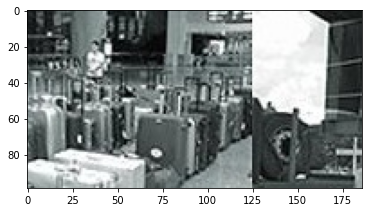

Confidence: 77.94 , Result: not a face


In [264]:
json_path = "D:/Project/Machine-learning/Qlue-Technical-test/"
file = open(json_path + "/inference.json")
imgdir = "D:/Project/Machine-learning/Qlue-Technical-test/face_test_example/test_example"

inference = json.load(file)
len(inference)

x = 0

for key,value in inference.items():
    imgName = list(inference.keys())[x]
#     print(key)
    for folder in os.listdir(imgdir):
        for filename in os.listdir(imgdir + "/" + folder)[:]:
            if filename == imgName:
                image = cv2.imread(imgdir + "/" + folder + "/" + imgName,1)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.show()
                
                confidence = value[0]
                result = value[1]
                
                if result == 0:
                    result = "not a face"
                else:
                    result = "face"
                    
                print("Confidence: {} , Result: {}".format(confidence, result))
    x+=1
    if x >= 10:
        break